# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 8: *InvariantMoments*
Compute invariant moments of a shape in an image 
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import imageReadL, plotImageL, createImageF
from PrintUtilities import printImageRangeF, printText
from ImageRegionsUtilities import pixlesList

# Math and iteration
from math import  pi, atan, sin, cos, log10
from timeit import itertools

### Parameters:
    pathToDir = Input image directory
    imageName = Input image name
    numMoments = Number of moments
    background = The gray level range of the background pixels

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter8/Input/")
imageName = "f14rs.png"
numMoments = 4
background = [200, 255] # white background image

### Obtain a shape from the input image and show shape is a 2 row image with y,x coordinates# Show input image

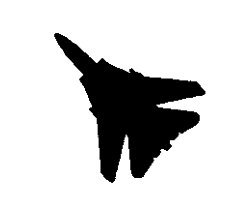

In [3]:
inputImage, width, height = imageReadL(pathToDir+imageName)
plotImageL(inputImage, figureSize = 3)

### Compute geometric moments

In [4]:
# Get a list that contains the pixels of the shape in the form (y,x,val) 
# We could have used the border pixels
imageRegion = pixlesList(inputImage, background)

# Compute geometric moments
numPoints = len(imageRegion)
M = createImageF(numMoments,numMoments)
for m,n in itertools.product(range(0, numMoments), range(0, numMoments)):
    for indexPixel in range(0, numPoints):
        y = (imageRegion[indexPixel])[0]
        x = (imageRegion[indexPixel])[1]
        v = (imageRegion[indexPixel])[2]
        M[n,m] += (x**n) * (y**m) * v

### Geometric central Moments

In [5]:
xc,yc = M[1,0]/M[0,0], M[0,1]/M[0,0]
centMom = createImageF(numMoments,numMoments)
for m,n in itertools.product(range(0, numMoments), range(0, numMoments)):
    for indexPixel in range(0, numPoints):
        y = (imageRegion[indexPixel])[0]
        x = (imageRegion[indexPixel])[1]
        v = (imageRegion[indexPixel])[2]
        centMom[n,m] += ((x-xc)**n) * ((y-yc)**m) * v

### Scale normalized geometric central Moments 

In [6]:
centMomNorm = createImageF(numMoments,numMoments)
for m,n in itertools.product(range(0, numMoments), range(0, numMoments)):
    c = 1 + ((n + m) / 2.0)
    centMomNorm[n,m] = centMom[n,m] / pow(centMom[0,0], c)

### Angle from central moments

In [7]:
if centMom[2,0] < centMom[0,2]:
    t = 0.5 * atan(2.0*centMom[1,1]/(centMom[2,0]-centMom[0,2])) + pi/2.0
else:
    t = 0.5 * atan(2.0*centMom[1,1]/(centMom[2,0]-centMom[0,2]))

### Geometric invariant moments from image region

In [8]:
# Opposite direction for rotation invariant
t = -t;

# Geometric invariant moments from image region
vn = createImageF(numMoments,numMoments)
for m,n in itertools.product(range(0, numMoments), range(0, numMoments)):
    for indexPixel in range(0, numPoints):
        y = (imageRegion[indexPixel])[0]
        x = (imageRegion[indexPixel])[1]
        val = (imageRegion[indexPixel])[2]
        vn[n,m] += ((x-xc)*cos(t) - (y-yc)*sin(t))**n *                     \
                   ((x-xc)*sin(t) + (y-yc)*cos(t))**m * val
    c = 1 + ((n + m) / 2.0)
    if vn[n,m] > 0: vn[n,m] = log10(vn[n,m] / pow(M[0,0],c))
    else:           vn[n,m] = 0  
    
printImageRangeF(vn, [0,numMoments-1],[0,numMoments-1], "6.2f")



[   0.00   0.00  -1.10  -3.21 ]
[ -16.97 -15.10  -1.83   0.00 ]
[  -0.86   0.00  -2.20   0.00 ]
[   0.00  -3.46  -2.74   0.00 ]


#### Compute invariant moments from normailsed central moments

In [9]:
m1 = centMomNorm[2,0] + centMomNorm[0,2]
m2 = (centMomNorm[2,0] - centMomNorm[0,2])**2 + 4*  (centMomNorm[1,1]**2)  
m3 = (centMomNorm[3,0] - 3.0*centMomNorm[1,2])**2 + (3.0*centMomNorm[2,1]  \
                       - centMomNorm[0,3])**2

printText("M1 = " + '%.4f' % m1)
printText("M2 = " + '%.4f' % m2)
printText("M3 = " + '%.4f' % m3)

M1 = 0.2192
M2 = 0.0036
M3 = 0.0069
